In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

/home/sannhtet/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [4]:
#Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

#Using the formula to calculate m and b
number = np.sum((X - mean_x) * (Y - mean_y))
denom = np.sum(np.square(X - mean_x))

m = number / denom
b = mean_y - (m * mean_x)

print(m, b)

0.2634293394893993 325.5734210494428


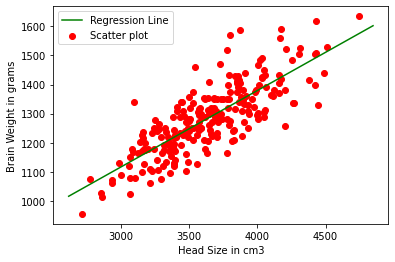

In [5]:
#Plotting Values and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = m * x + b

#Plotting line
plt.plot(x,y,color="green",label="Regression Line")
#Plotting scatter points
plt.scatter(X, Y, c="red", label="Scatter plot")

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

In [6]:
#Calculate R_squared eror
y_pred = m * X + b
r2 =1 - (np.sum(np.square(Y-y_pred)) / np.sum(np.square(Y-mean_y)))
print(r2)

0.639311719957


In [7]:
#Building model using machine learning libaries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
#Cannot use Rank1 matrix in scikit learn
X = X.reshape(-1,1)

#Creating model
model = LinearRegression()

#Fitting model
model.fit(X,Y)

#Y prediction
Y_pred = model.predict(X)

#Calculating R2_score
r2_score = model.score(X,Y)
print(r2_score)

0.639311719957
